In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings

from IPython.display import display
warnings.filterwarnings('ignore')

In [4]:
def processDfColumn(filename):
    df = pd.read_csv(filename)
    df = df.filter(['UID', 'ANALYTE', 'RESULT'])
    df = df.pivot(index='UID', columns='ANALYTE', values='RESULT')
    df = df.apply(pd.to_numeric, errors="coerce")
    return df

folder = "data/"
df_GL_15 = processDfColumn(folder + "CoastalGreatLakes_2015_column.csv")
df_L_17 = processDfColumn(folder + "Lakes_2017_column.csv")

display(df_GL_15.head())
display(df_L_17.head())


ANALYTE,AMMONIA_N,CHLA,CHLORIDE,COND,DIN,NITRATE_N,NITRITE_N,NTL,PH,PTL,SILICA,SRP,SULFATE
UID,,,,,,,,,,,,,
167240,0.004,0.32,12.118,284.0,0.259,0.253,0.002,0.436,8.17,0.0048,NaN,0.005145,21.481
167242,0.004,0.30,12.106,284.0,0.252,0.246,0.002,0.433,8.18,0.0052,NaN,0.005109,21.526
167245,0.005,0.34,12.113,286.0,0.253,0.246,0.002,0.441,8.18,0.0050,NaN,0.004766,21.347
167270,0.003,0.34,12.071,281.0,0.259,0.254,0.002,0.418,8.13,0.0048,NaN,0.005323,21.382
167300,0.006,0.29,12.054,279.0,0.267,0.259,0.002,0.438,7.99,0.0045,NaN,0.005126,21.556


ANALYTE,ALUMINUM,AMMONIA_N,ANC,BATCH_ID,CALCIUM,CHLA,CHLORIDE,COLOR,COND,DOC,...,NITRITE_N,NTL,PH,POTASSIUM,PTL,SILICA,SODIUM,SULFATE,TKN,TURB
UID,,,,,,,,,,,,,,,,,,,,,
2010177,NaN,0.599,2496.93,NaN,239.126,5.19,101.625,25.0,2172.4,7.72,...,0.020,1.343,7.95,4.588,92.32500,6.996,162.598,1004.914,NaN,3.16
2010178,NaN,0.027,2681.74,NaN,30.447,12.16,8.668,27.0,333.4,7.12,...,0.000,0.900,8.45,4.635,234.69500,33.686,20.829,20.639,NaN,2.72
2010179,NaN,0.014,9739.84,NaN,27.385,6.14,119.687,35.0,3206.2,27.17,...,0.000,2.750,8.92,70.860,63.34750,14.273,381.525,1229.337,NaN,2.68
2010180,NaN,0.086,99001.42,NaN,11.668,0.60,5693.816,5.0,29931.9,62.55,...,0.000,2.323,9.40,397.076,700.47000,2.726,8198.132,5666.998,NaN,0.68
2010181,NaN,0.051,1125.87,NaN,18.831,305.28,25.178,35.0,223.5,6.92,...,0.003,1.735,7.90,2.548,170.41125,1.310,21.088,6.150,NaN,10.57


In [5]:
def processDfWide(filename):
    df = pd.read_csv(filename)
    df = df.filter([col for col in df.columns if (('RESULT' in col) and ('UNITS' not in col)) or col == 'UID'])
    for col in df.columns:
        if col != "UID":
            df.rename({col : "_".join(col.split("_")[:len(col.split("_")) - 1])}, axis=1, inplace=True)
    df = df.apply(pd.to_numeric, errors="coerce")
    return df

df_RS_1314 = processDfWide(folder + "RiversStreams_201314_wide.csv")
df_L_12 = processDfWide(folder + "Lakes_2012_wide.csv")
df_RS_1819 = processDfWide(folder + "RiversStreams_201819_wide.csv")
df_WL_16 = processDfWide(folder + "Wetlands_2016_wide.csv")

display(df_RS_1314.head())
display(df_L_12.head())
display(df_RS_1819.head())
display(df_WL_16.head())

,UID,AMMONIA_N,ANC,CALCIUM,CHLORIDE,COLOR,COND,DOC,MAGNESIUM,NITRATE_N,...,NITRITE_N,NTL,PH,POTASSIUM,PTL,SILICA,SODIUM,SULFATE,TSS,TURB
0,1002013,0.011,4822.28,114.80,169.008,12.0,1158.0,4.56,20.330,0.000,...,0.00,0.350,7.88,3.664,59.0,8.977,114.30,105.096,6.5,3.50
1,1002014,10.209,3629.06,70.04,154.270,30.0,1218.0,6.71,10.590,6.069,...,0.31,20.225,7.86,19.610,3269.0,36.988,153.40,151.101,17.2,5.70
2,1002015,0.014,1571.94,28.30,1.336,0.0,192.2,1.26,6.822,0.021,...,0.00,0.086,7.84,0.579,18.0,6.979,2.13,19.442,0.6,1.16
3,1002016,0.008,4437.60,81.49,83.541,24.0,865.0,5.73,16.920,0.304,...,0.00,1.475,8.33,11.940,311.0,16.819,85.55,106.315,49.4,28.78
4,1002017,0.008,5889.98,74.38,5.156,0.0,529.0,0.75,28.520,0.039,...,0.00,0.123,8.00,1.160,32.0,15.768,5.32,4.139,0.8,0.01


,UID,ALUMINUM,AMMONIA_N,ANC,CALCIUM,CHLORIDE,COLOR,COND,DOC,MAGNESIUM,...,NTL,PH,POTASSIUM,PTL,SILICA,SODIUM,SULFATE,TOC,TSS,TURB
0,1000001,0.007,0.0021,180.7,2.421,1.239,2.0,30.4,4.78,0.891,...,0.396,6.53,0.930,22.0,3.621,1.636,3.371,NaN,NaN,1.57
1,1000010,0.020,0.0087,240.8,2.441,1.261,26.0,31.5,7.47,1.051,...,1.226,7.71,1.622,66.0,2.162,1.537,0.959,NaN,NaN,21.78
2,1000011,0.012,0.0099,209.8,1.413,0.965,19.0,27.9,6.95,1.453,...,0.990,7.55,2.447,45.0,1.130,1.049,1.110,NaN,NaN,8.12
3,1000013,0.031,0.0110,273.5,4.865,4.785,32.0,52.3,5.61,0.728,...,0.261,7.53,0.879,18.0,4.853,3.855,2.774,NaN,NaN,0.37
4,1000014,0.000,0.0040,342.9,8.632,8.969,26.0,141.2,6.50,4.877,...,0.445,7.67,3.457,30.0,8.921,8.341,30.626,NaN,NaN,2.08


,UID,AMMONIA_N,ANC,CALCIUM,CHLORIDE,COLOR,COND,DOC,MAGNESIUM,NITRATE_N,...,PTL_DISS,PTL,SILICA,SODIUM,SULFATE,TKN,TSS,TURB,CHLA,PHEO
0,2014737,NaN,6380.0,65.2,24.50,60.0,632.0,5.49,12.3,1.570,...,NaN,223.0,30.50,55.90,20.40,1.66,264.0,123.00,8.90,17.60
1,2012488,0.0990,3270.0,92.1,5.70,20.0,959.0,4.45,39.4,0.133,...,NaN,55.0,6.65,23.70,365.00,NaN,23.0,15.80,11.40,15.90
2,2012489,NaN,5130.0,43.5,5.70,28.0,450.0,2.18,28.1,0.033,...,NaN,50.0,8.65,6.55,8.20,0.27,18.0,15.60,8.54,2.22
3,2012490,0.0454,NaN,86.0,36.00,20.0,NaN,3.52,43.8,7.930,...,NaN,199.0,15.80,9.64,22.20,NaN,8.0,7.68,1.18,NaN
4,2012491,0.0183,2460.0,29.8,4.03,30.0,267.0,4.88,14.1,NaN,...,NaN,17.9,10.80,3.06,7.23,NaN,NaN,2.29,1.19,NaN


,UID,AMMONIA_N,CHLA,CHLORIDE,COND,DOC,NITRATE_NITRITE_N,NTL,PH,PTL,SULFATE,TKN,TURB
0,197070,0.040,2.670,10.6,54.8,16.4,0.25,0.895,7.30,65.0,2.30,0.645,19.00
1,197120,NaN,7.282,11.1,73.0,31.6,0.04,1.210,7.07,110.0,1.10,1.160,13.70
2,197140,0.352,NaN,11.9,106.0,144.0,0.08,2.140,3.66,64.0,0.34,2.060,1.48
3,197161,0.045,76.896,12.9,51.0,23.8,0.07,1.960,5.79,40.0,0.83,1.890,0.39
4,197180,0.635,5.340,1.6,97.0,39.3,0.04,2.060,7.21,250.0,0.36,2.010,25.40


In [6]:
dataframes = [df_GL_15, df_L_17, df_RS_1314, df_L_12, df_RS_1819, df_WL_16]

def checkForNull(df):
    Sum = df.isnull().sum()
    Percentage = (df.isnull().sum()/df.isnull().count())
    nulls = pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])
    return nulls.loc[~(nulls["Sum"] == 0)]

for df in dataframes:
    display(checkForNull(df))

,Sum,Percentage
ANALYTE,,
AMMONIA_N,74,0.1850
CHLORIDE,23,0.0575
COND,23,0.0575
NITRATE_N,15,0.0375
NITRITE_N,40,0.1000
NTL,3,0.0075
PH,23,0.0575
PTL,5,0.0125
SILICA,377,0.9425


,Sum,Percentage
ANALYTE,,
ALUMINUM,1159,0.957851
AMMONIA_N,77,0.063636
ANC,2,0.001653
BATCH_ID,1210,1.000000
CALCIUM,3,0.002479
CHLORIDE,17,0.014050
COLOR,32,0.026446
COND,24,0.019835
DOC,11,0.009091


,Sum,Percentage
ANC,2,0.000885
CALCIUM,1,0.000442
COND,1,0.000442
MAGNESIUM,1,0.000442
NITRATE_N,21,0.009288
NITRATE_NITRITE_N,2078,0.919062
NITRITE_N,183,0.080938
PH,54,0.023883
SULFATE,1,0.000442
TURB,1,0.000442


,Sum,Percentage
ALUMINUM,168,0.136585
AMMONIA_N,1,0.000813
COLOR,1,0.000813
NITRATE_N,52,0.042276
NITRATE_NITRITE_N,1,0.000813
NITRITE_N,168,0.136585
POTASSIUM,2,0.001626
SODIUM,1,0.000813
TOC,1178,0.957724
TSS,1114,0.905691


,Sum,Percentage
AMMONIA_N,73,0.034564
ANC,6,0.002841
CALCIUM,1,0.000473
CHLORIDE,1,0.000473
COLOR,1,0.000473
COND,2,0.000947
DOC,4,0.001894
MAGNESIUM,1,0.000473
NITRATE_N,76,0.035985
NITRATE_NITRITE_N,2032,0.962121


,Sum,Percentage
AMMONIA_N,275,0.372124
CHLA,62,0.083897
CHLORIDE,62,0.083897
DOC,18,0.024357
NITRATE_NITRITE_N,249,0.336942
PTL,2,0.002706
SULFATE,83,0.112314
TKN,45,0.060893
TURB,2,0.002706


In [7]:
def convertToNNN(df):
    for i in df.index:
        if "NITRATE_NITRITE_N" not in df.columns or pd.isna(df.at[i, "NITRATE_NITRITE_N"]):
            df.at[i, "NITRATE_NITRITE_N"] = 0
            if "NITRATE_N" in df.columns and not pd.isna(df.at[i, "NITRATE_N"]):
                df.at[i, "NITRATE_NITRITE_N"] += df.at[i, "NITRATE_N"]
            if "NITRITE_N" in df.columns and not pd.isna(df.at[i, "NITRITE_N"]):
                df.at[i, "NITRATE_NITRITE_N"] += df.at[i, "NITRITE_N"]
    if "NITRATE_N" in df.columns:
        df.drop({"NITRATE_N"}, axis=1, inplace=True)
    if "NITRITE_N" in df.columns:
        df.drop({"NITRITE_N"}, axis=1, inplace=True)
    return df

for i in range(len(dataframes)):
    dataframes[i] = convertToNNN(dataframes[i])
    display(checkForNull(dataframes[i]))


,Sum,Percentage
ANALYTE,,
AMMONIA_N,74,0.1850
CHLORIDE,23,0.0575
COND,23,0.0575
NTL,3,0.0075
PH,23,0.0575
PTL,5,0.0125
SILICA,377,0.9425
SRP,15,0.0375
SULFATE,23,0.0575


,Sum,Percentage
ANALYTE,,
ALUMINUM,1159,0.957851
AMMONIA_N,77,0.063636
ANC,2,0.001653
BATCH_ID,1210,1.000000
CALCIUM,3,0.002479
CHLORIDE,17,0.014050
COLOR,32,0.026446
COND,24,0.019835
DOC,11,0.009091


,Sum,Percentage
ANC,2,0.000885
CALCIUM,1,0.000442
COND,1,0.000442
MAGNESIUM,1,0.000442
PH,54,0.023883
SULFATE,1,0.000442
TURB,1,0.000442


,Sum,Percentage
ALUMINUM,168,0.136585
AMMONIA_N,1,0.000813
COLOR,1,0.000813
POTASSIUM,2,0.001626
SODIUM,1,0.000813
TOC,1178,0.957724
TSS,1114,0.905691
TURB,41,0.033333


,Sum,Percentage
AMMONIA_N,73,0.034564
ANC,6,0.002841
CALCIUM,1,0.000473
CHLORIDE,1,0.000473
COLOR,1,0.000473
COND,2,0.000947
DOC,4,0.001894
MAGNESIUM,1,0.000473
NTL_DISS,162,0.076705
NTL,2,0.000947


,Sum,Percentage
AMMONIA_N,275,0.372124
CHLA,62,0.083897
CHLORIDE,62,0.083897
DOC,18,0.024357
PTL,2,0.002706
SULFATE,83,0.112314
TKN,45,0.060893
TURB,2,0.002706


In [8]:
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].loc[:, dataframes[i].isnull().mean() < .9]
    values = {}
    for feat in dataframes[i].columns:
        if dataframes[i][feat].isna().any():
            values[feat] = round(dataframes[i][feat].mean(),2)
        dataframes[i].fillna(value=values,inplace=True)
    
    print("Number of columns: " + str(len(dataframes[i].columns)))

Number of columns: 11
Number of columns: 18
Number of columns: 19
Number of columns: 19
Number of columns: 22
Number of columns: 13


In [9]:
df1 = pd.concat(dataframes, join='inner', ignore_index=True) #simple
df2 = pd.concat(dataframes[1:4], join='inner', ignore_index=True) #detailed

display(df1.head())
print(len(df1.index))
display(df2.head())
print(len(df2.index))

,AMMONIA_N,CHLORIDE,COND,NTL,PH,PTL,SULFATE,NITRATE_NITRITE_N
0,0.004,12.118,284.0,0.436,8.17,0.0048,21.481,0.255
1,0.004,12.106,284.0,0.433,8.18,0.0052,21.526,0.248
2,0.005,12.113,286.0,0.441,8.18,0.0050,21.347,0.248
3,0.003,12.071,281.0,0.418,8.13,0.0048,21.382,0.256
4,0.006,12.054,279.0,0.438,7.99,0.0045,21.556,0.261


7952


,AMMONIA_N,ANC,CALCIUM,CHLORIDE,COLOR,COND,DOC,MAGNESIUM,NITRATE_NITRITE_N,NTL,PH,POTASSIUM,PTL,SILICA,SODIUM,SULFATE,TURB
0,0.599,2496.93,239.126,101.625,25.0,2172.4,7.72,109.932,0.1823,1.343,7.95,4.588,92.32500,6.996,162.598,1004.914,3.16
1,0.027,2681.74,30.447,8.668,27.0,333.4,7.12,12.867,0.0196,0.900,8.45,4.635,234.69500,33.686,20.829,20.639,2.72
2,0.014,9739.84,27.385,119.687,35.0,3206.2,27.17,251.264,0.0507,2.750,8.92,70.860,63.34750,14.273,381.525,1229.337,2.68
3,0.086,99001.42,11.668,5693.816,5.0,29931.9,62.55,160.715,1.0637,2.323,9.40,397.076,700.47000,2.726,8198.132,5666.998,0.68
4,0.051,1125.87,18.831,25.178,35.0,223.5,6.92,2.985,0.1025,1.735,7.90,2.548,170.41125,1.310,21.088,6.150,10.57


4701


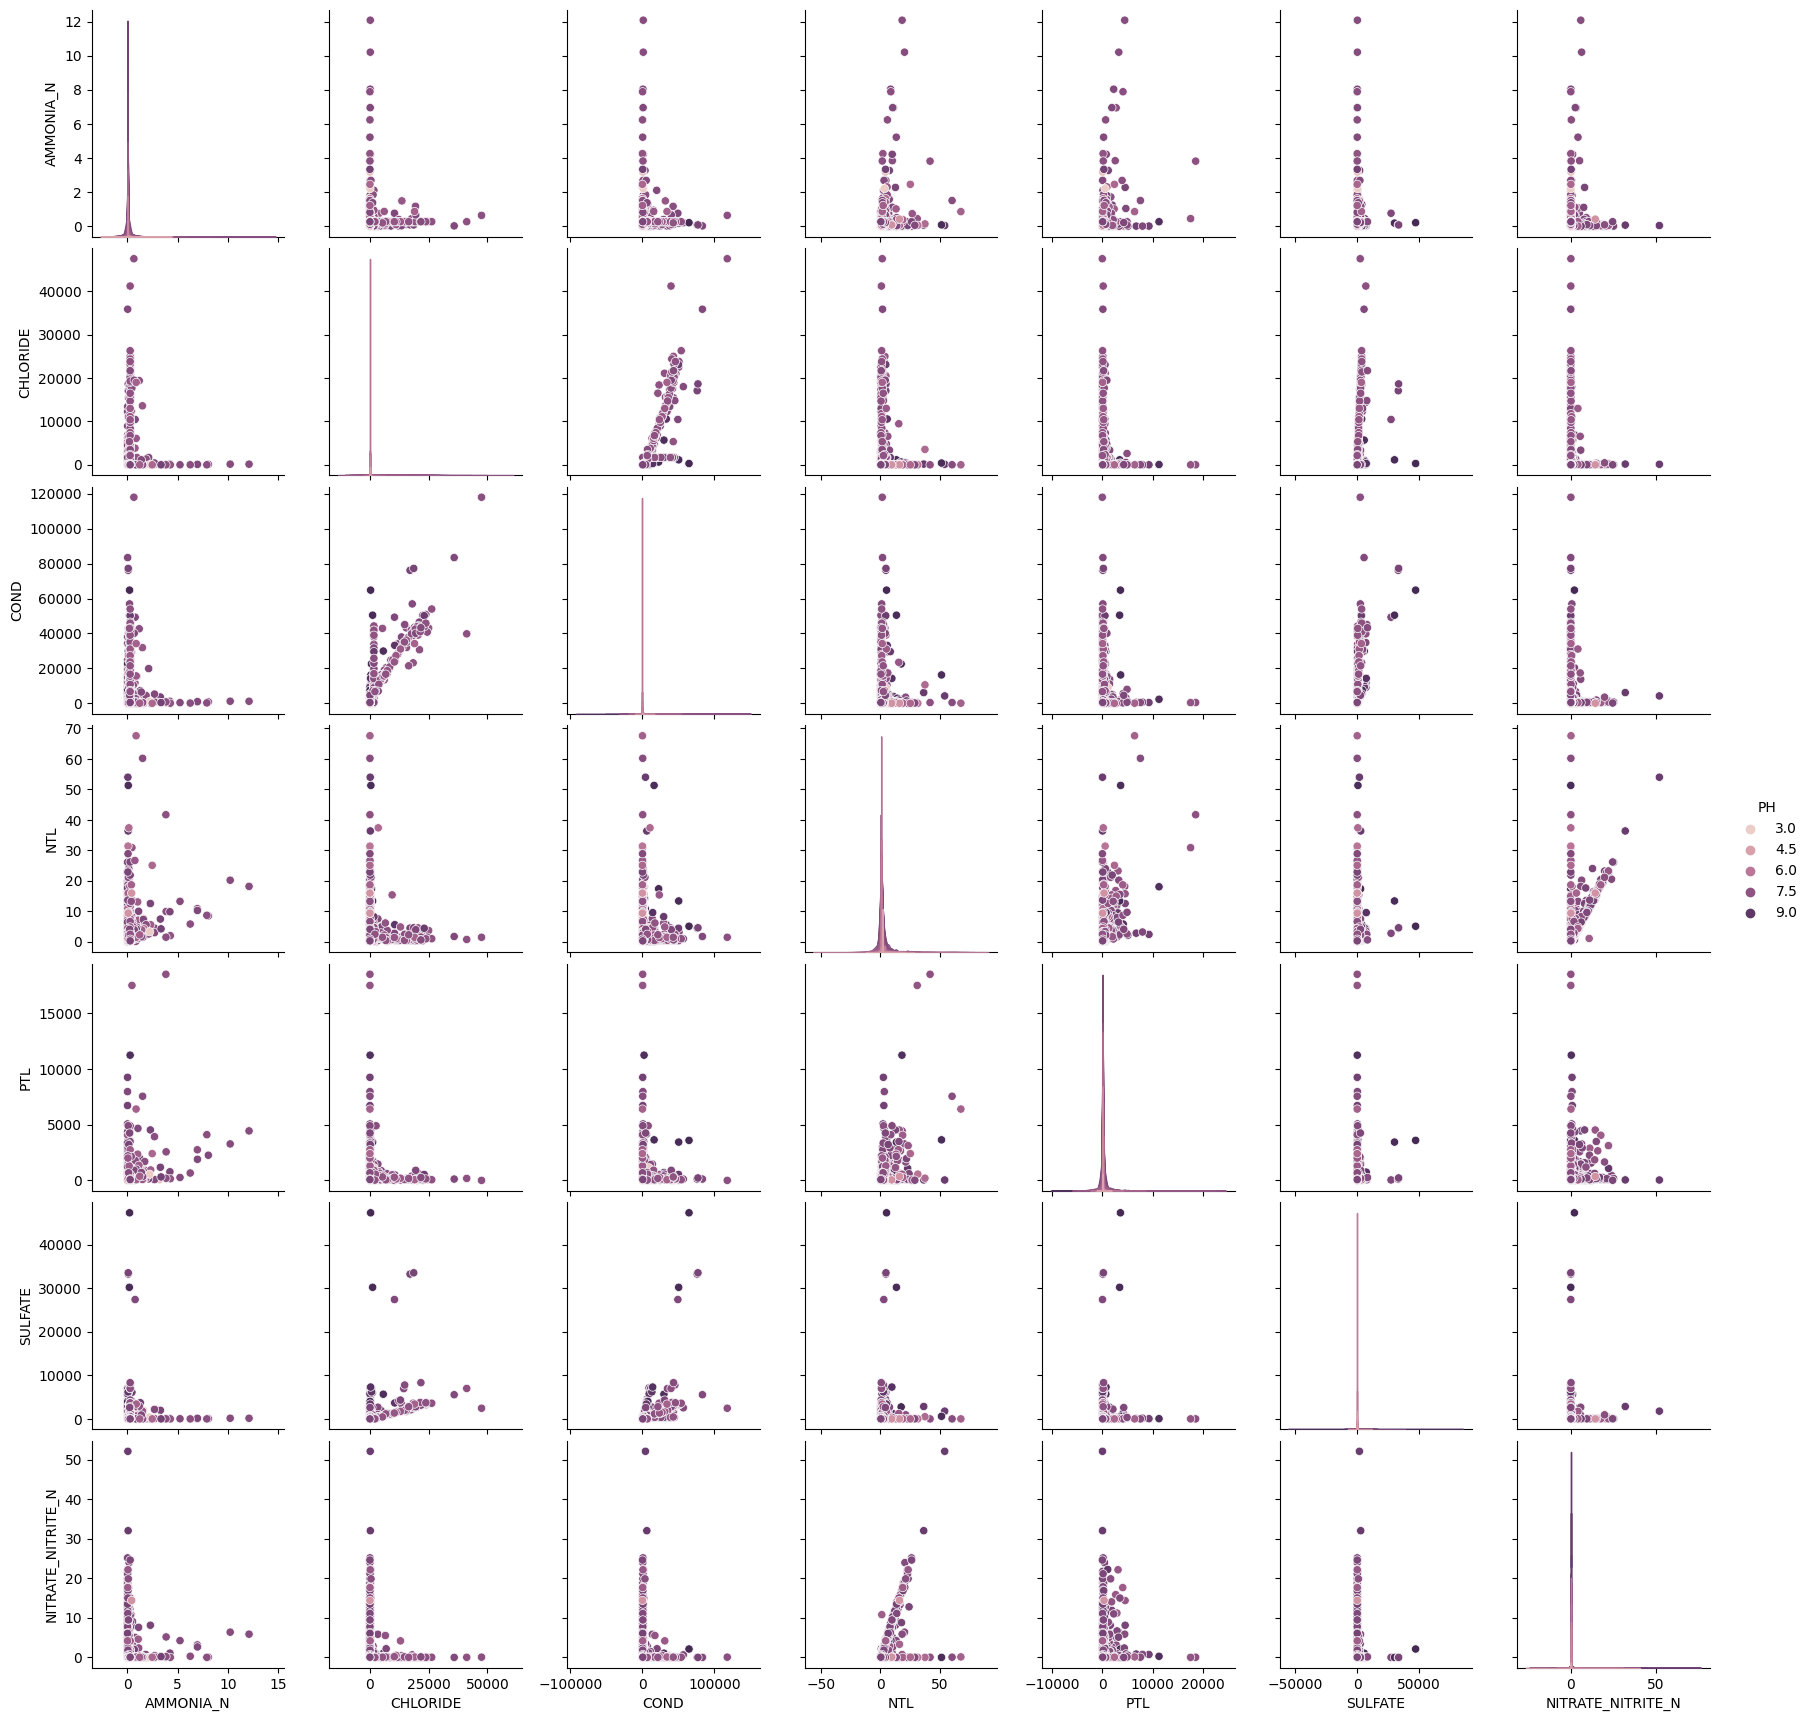

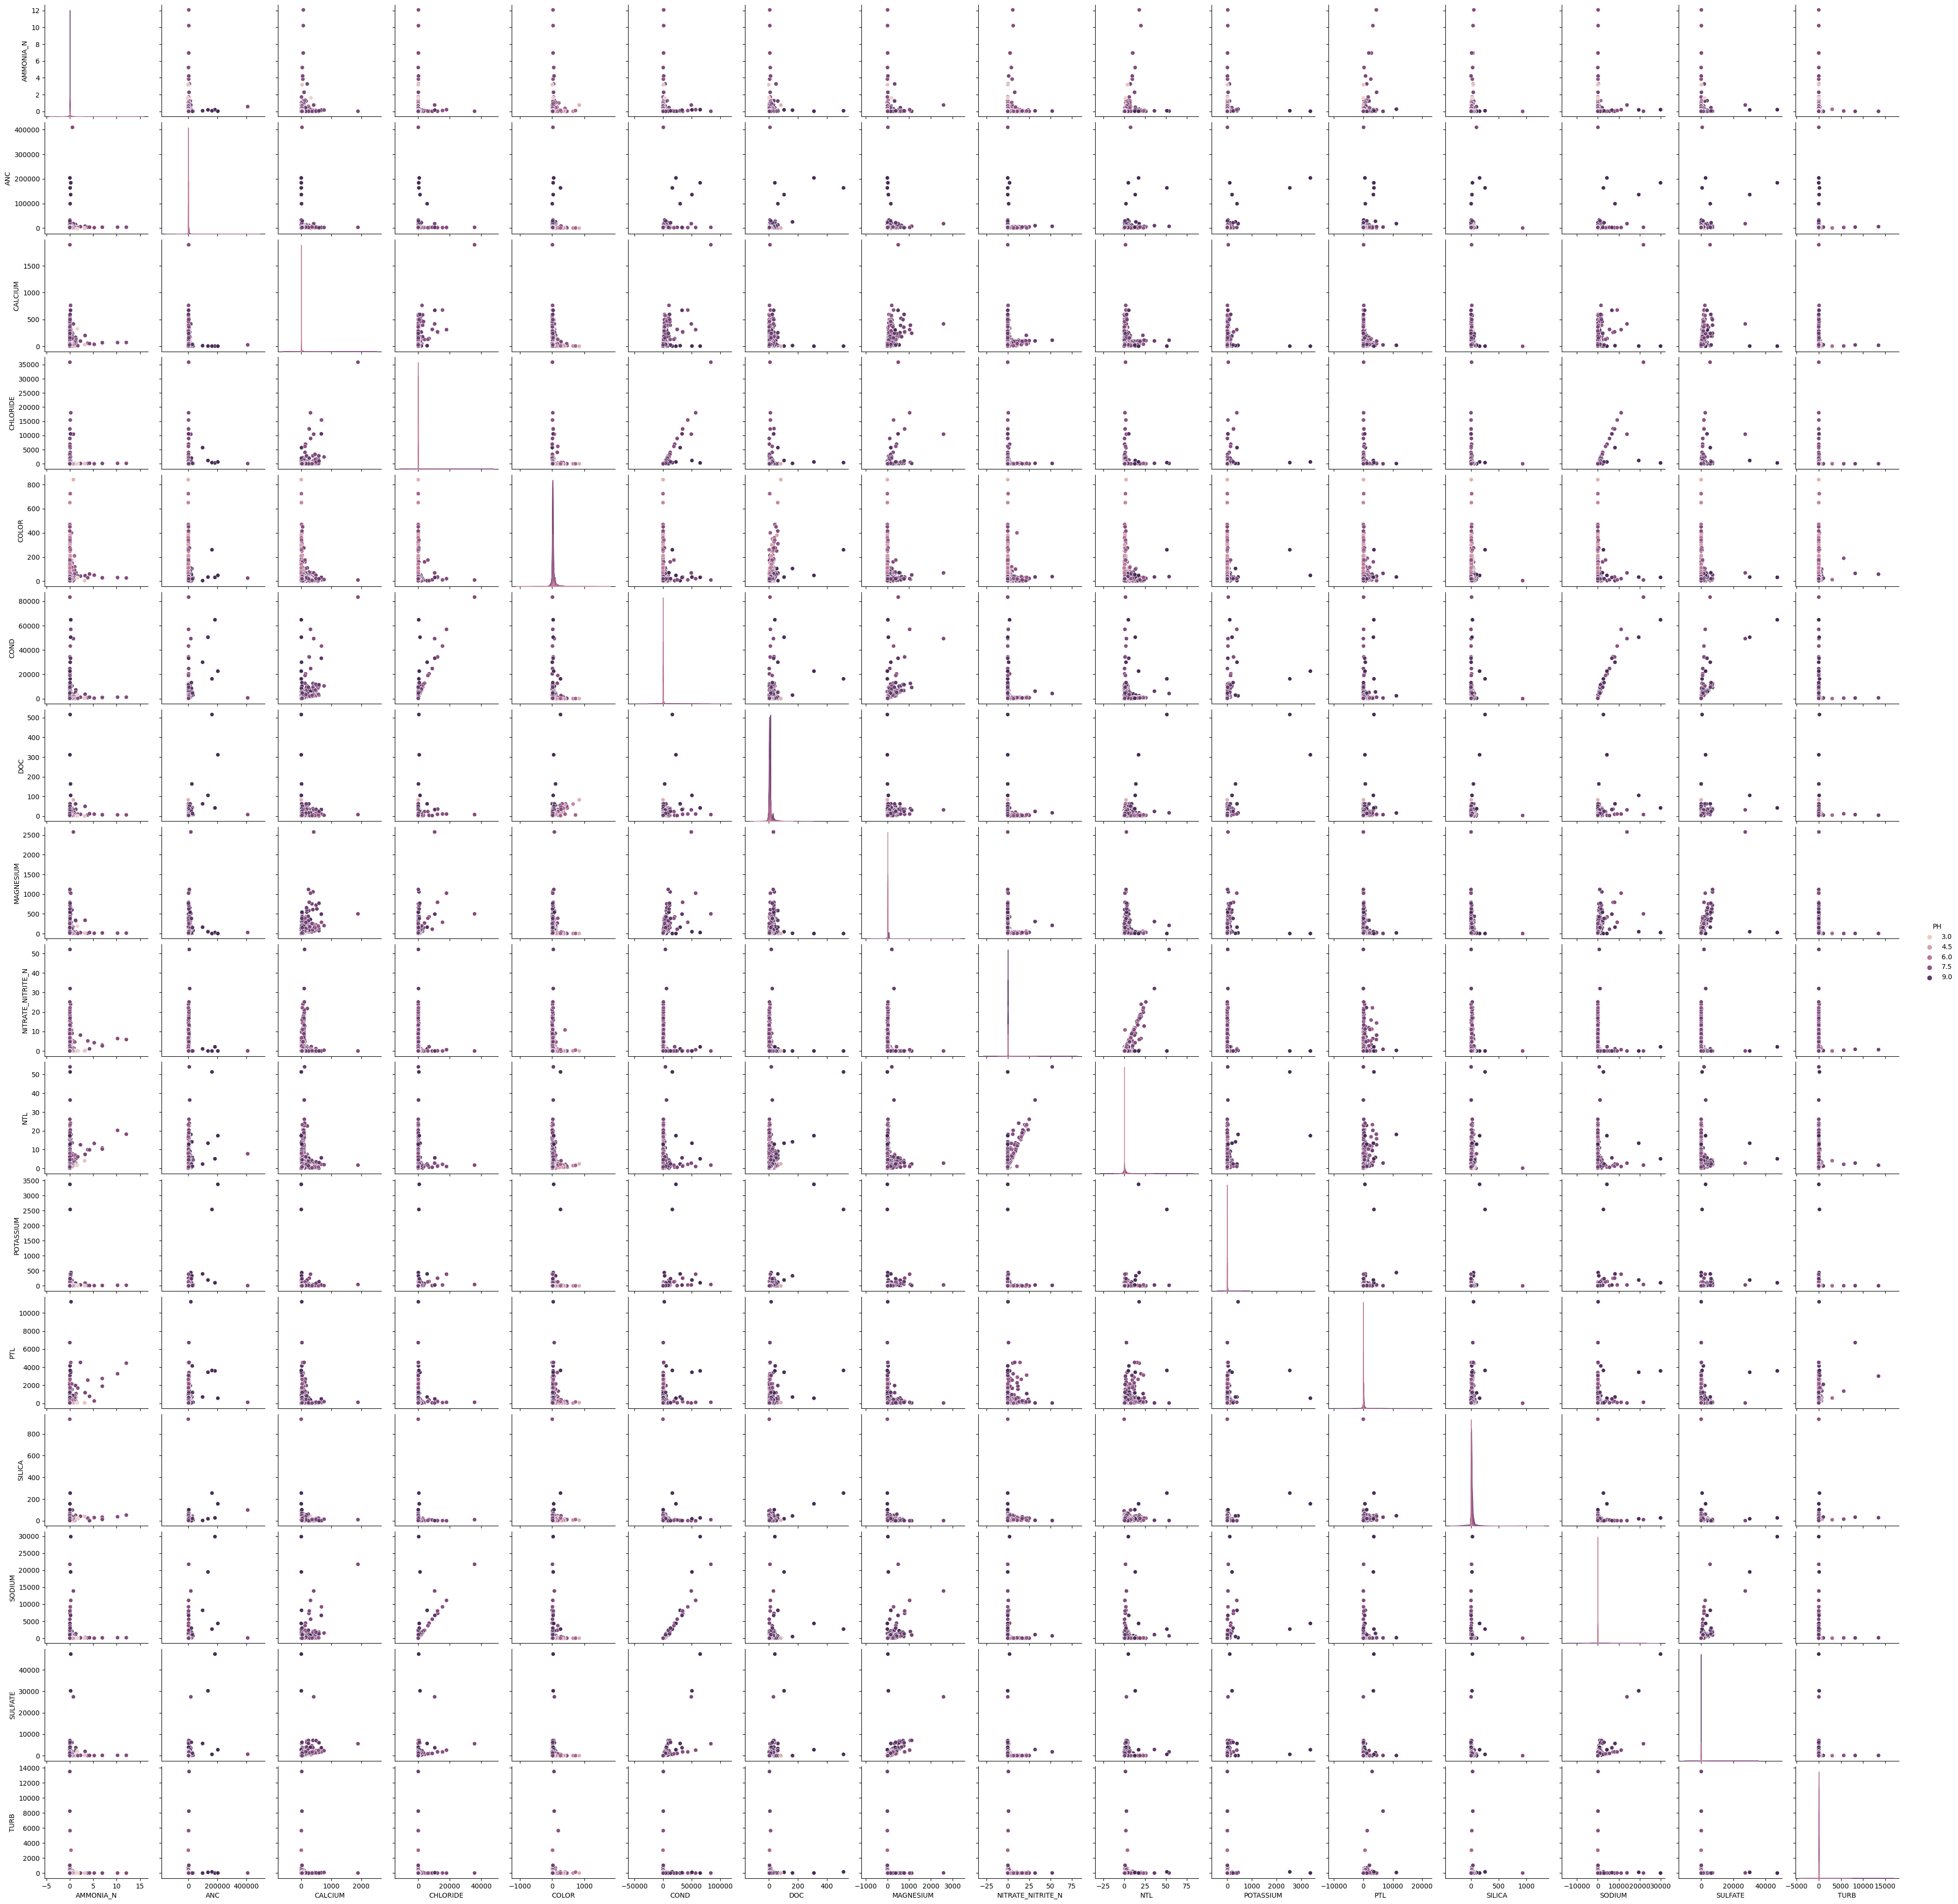

In [10]:
display(sns.pairplot(df1, hue="PH"))
display(sns.pairplot(df2, hue="PH"))

Text(0, 0.5, 'correlation')

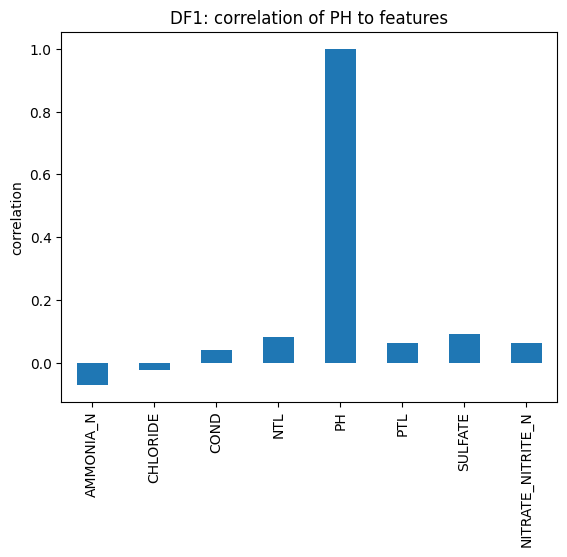

In [11]:
ax = df1.corr()['PH'].plot(kind='bar',title='DF1: correlation of PH to features')
ax.set_ylabel('correlation')

Text(0, 0.5, 'correlation')

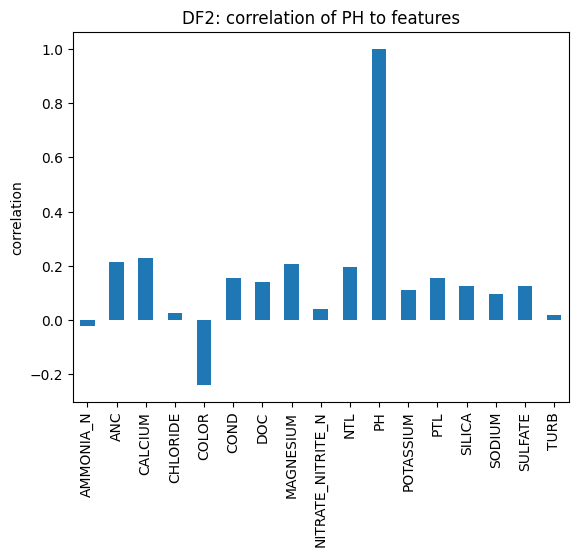

In [12]:
ax = df2.corr()['PH'].plot(kind='bar',title='DF2: correlation of PH to features')
ax.set_ylabel('correlation')

Text(0.5, 1.0, 'Correlation Matrix')

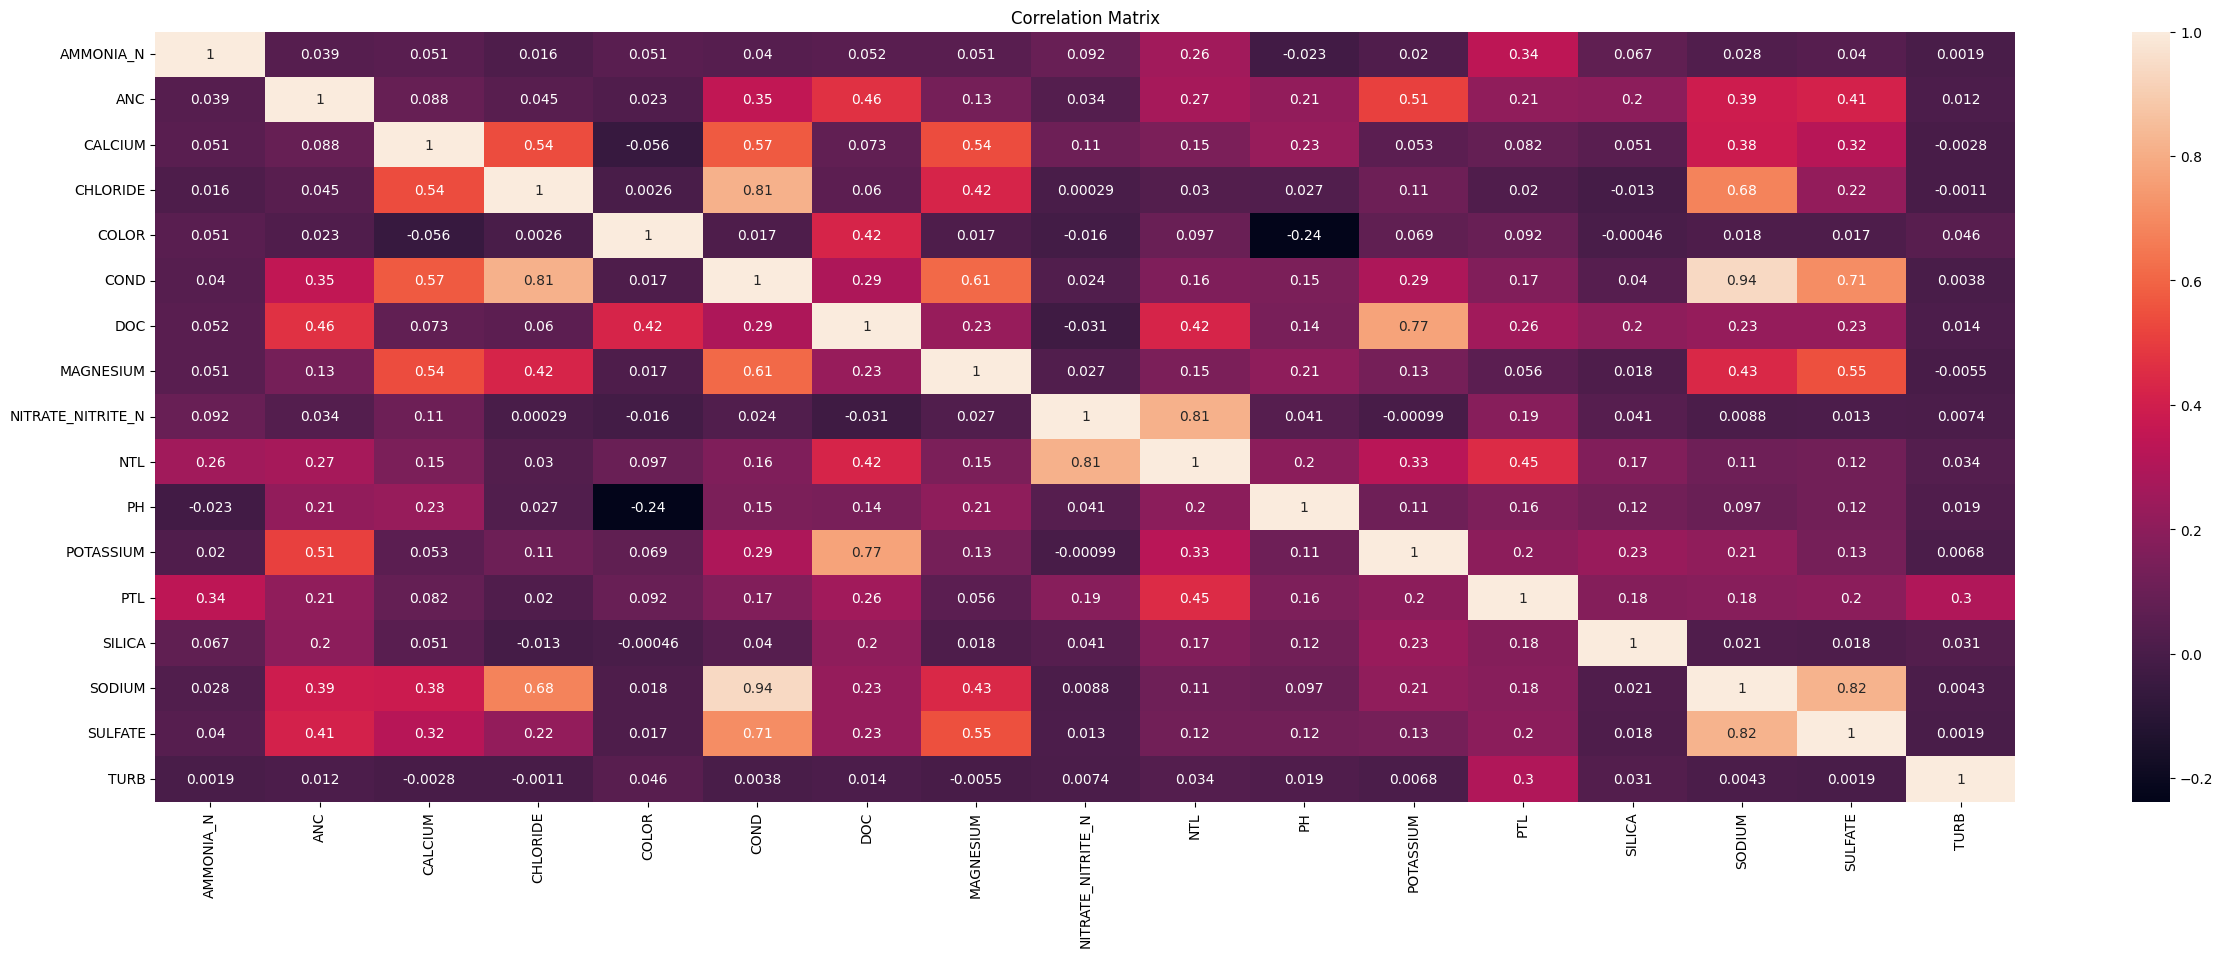

In [13]:
plt.figure(figsize=(30,10))
sns.heatmap(df2.corr(),annot=True).set_title("Correlation Matrix")

In [14]:
display(df1.describe())
display(df2.describe())

,AMMONIA_N,CHLORIDE,COND,NTL,PH,PTL,SULFATE,NITRATE_NITRITE_N
count,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000
mean,0.065787,220.427684,1040.821368,1.322594,7.911418,142.162284,162.152197,0.512415
std,0.317506,1796.644271,4591.066180,2.623328,0.691090,476.191664,1009.140886,1.780551
min,0.000000,0.015000,2.100000,0.000000,2.830000,-2.000000,0.000000,-0.007400
25%,0.009000,2.454750,99.300000,0.335000,7.580000,21.037063,3.059000,0.002000
50%,0.016000,9.230500,270.000000,0.642500,8.050000,50.679875,11.220500,0.030200
75%,0.040000,23.502250,553.225000,1.356000,8.340000,125.000000,41.841500,0.264550
max,12.084000,47500.000000,118000.000000,67.600000,10.470000,18500.000000,47325.202000,52.084000


,AMMONIA_N,ANC,CALCIUM,CHLORIDE,COLOR,COND,DOC,MAGNESIUM,NITRATE_NITRITE_N,NTL,PH,POTASSIUM,PTL,SILICA,SODIUM,SULFATE,TURB
count,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000,4701.000000
mean,0.046727,2496.614377,37.294224,64.304610,26.527922,644.955037,6.722855,22.842387,0.429788,1.209285,7.960715,6.901613,126.846172,10.780331,83.194852,151.766976,18.293458
std,0.313755,8269.367835,60.914067,753.410872,38.118251,2603.693500,11.373447,71.062946,1.843028,2.320338,0.708959,63.950122,333.704961,17.270831,740.661361,1025.390987,251.368235
min,0.000000,-3361.400000,0.060000,0.019000,0.000000,2.100000,0.190000,0.037000,-0.007400,0.000000,2.830000,0.001000,0.000000,0.022000,0.085000,0.000000,0.010000
25%,0.008000,494.190000,7.250000,2.181000,10.000000,87.200000,2.540000,1.946000,0.000000,0.305000,7.570000,0.930000,23.000000,3.985000,3.140000,2.677000,1.290000
50%,0.014080,1637.000000,23.060000,8.079000,18.000000,247.900000,4.510000,6.614000,0.007000,0.621000,8.070000,2.162000,49.000000,7.655000,8.180000,9.170000,3.400000
75%,0.030000,3200.000000,46.800000,21.634000,30.000000,530.100000,7.620000,19.710000,0.156000,1.266000,8.410000,4.494000,119.000000,13.828000,25.710000,40.546000,9.490000
max,12.084000,409631.000000,1893.000000,35861.567000,840.000000,83440.000000,515.810000,2576.000000,52.084000,54.000000,10.470000,3376.000000,11238.800000,935.000000,29890.000000,47325.202000,13498.050000


Text(0.5, 1.0, 'DF1: PH Values')

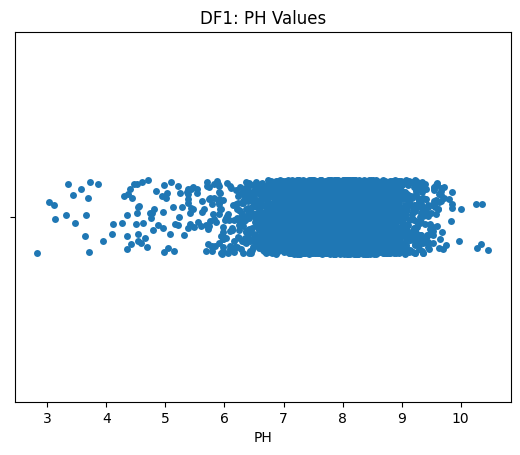

In [15]:
display(sns.stripplot(data=df1, x="PH").set_title("DF1: PH Values"))

Text(0.5, 1.0, 'DF2: PH Values')

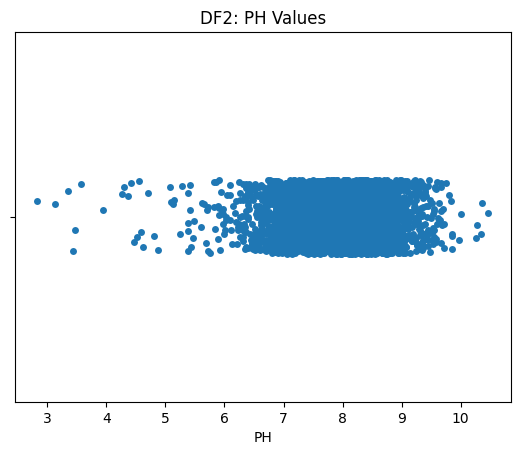

In [16]:

display(sns.stripplot(data=df2, x="PH").set_title("DF2: PH Values"))

In [28]:
bins = [0,6,8,14] 
labels = [0, 1, 2]
#0- acidic
#1- neutral
#2- alkaline

def convertToPHRange(df):
    df_bins = df.copy()
    df_bins["PH RANGE"]= pd.cut(x=df_bins["PH"], bins=bins, labels = labels)
    df_bins.drop(columns=["PH"], inplace=True)
    display(df_bins.head())
    return df_bins

df1_bins3 = convertToPHRange(df1)
df2_bins3 = convertToPHRange(df2)
df2_bins3.describe().to_csv("app_contents/df2_stats.csv")

,AMMONIA_N,CHLORIDE,COND,NTL,PTL,SULFATE,NITRATE_NITRITE_N,PH RANGE
0,0.004,12.118,284.0,0.436,0.0048,21.481,0.255,2
1,0.004,12.106,284.0,0.433,0.0052,21.526,0.248,2
2,0.005,12.113,286.0,0.441,0.0050,21.347,0.248,2
3,0.003,12.071,281.0,0.418,0.0048,21.382,0.256,2
4,0.006,12.054,279.0,0.438,0.0045,21.556,0.261,1


,AMMONIA_N,ANC,CALCIUM,CHLORIDE,COLOR,COND,DOC,MAGNESIUM,NITRATE_NITRITE_N,NTL,POTASSIUM,PTL,SILICA,SODIUM,SULFATE,TURB,PH RANGE
0,0.599,2496.93,239.126,101.625,25.0,2172.4,7.72,109.932,0.1823,1.343,4.588,92.32500,6.996,162.598,1004.914,3.16,1
1,0.027,2681.74,30.447,8.668,27.0,333.4,7.12,12.867,0.0196,0.900,4.635,234.69500,33.686,20.829,20.639,2.72,2
2,0.014,9739.84,27.385,119.687,35.0,3206.2,27.17,251.264,0.0507,2.750,70.860,63.34750,14.273,381.525,1229.337,2.68,2
3,0.086,99001.42,11.668,5693.816,5.0,29931.9,62.55,160.715,1.0637,2.323,397.076,700.47000,2.726,8198.132,5666.998,0.68,2
4,0.051,1125.87,18.831,25.178,35.0,223.5,6.92,2.985,0.1025,1.735,2.548,170.41125,1.310,21.088,6.150,10.57,1


Text(0.5, 1.0, 'PH Range Counts')

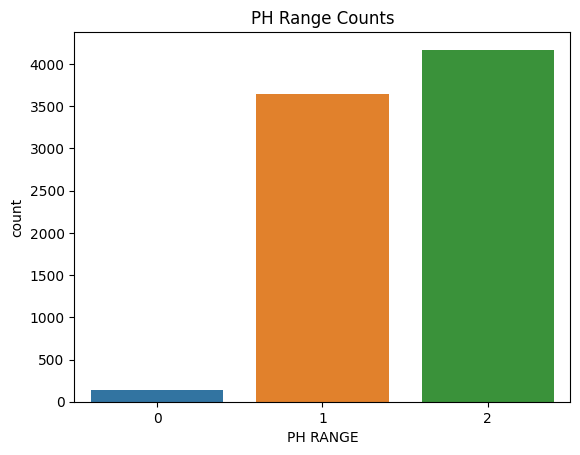

In [18]:
sns.countplot(data=df1_bins3, x="PH RANGE").set_title("PH Range Counts")

Text(0.5, 1.0, 'PH Range Counts')

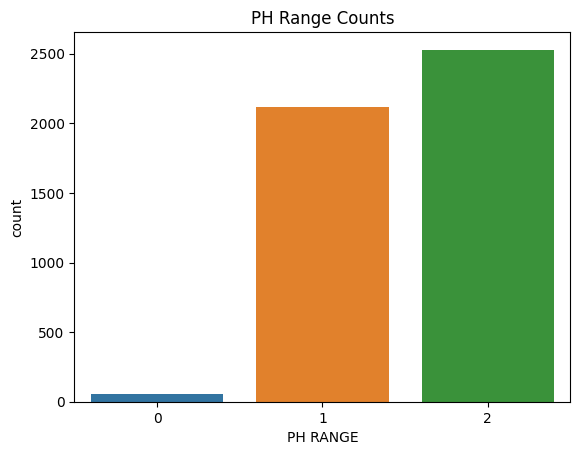

In [19]:
sns.countplot(data=df2_bins3, x="PH RANGE").set_title("PH Range Counts")

In [20]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 

In [21]:
def skManualModelTrain(df, df_name, column_name):
    names = ["LOGISTIC REGRESSION", "LINEAR SVC", "DECISION TREE CLASSIFIER", "MLP CLASSIFIER"]
    models = [
        LogisticRegression(random_state=40),
        LinearSVC(random_state=40),
        DecisionTreeClassifier(random_state=40),
        MLPClassifier(random_state=40)
    ]

    X = df.drop(columns=[column_name],axis=1) 
    y = df[column_name]

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

    print(df_name + " Performance")
    for i in range(len(models)):
        model = models[i]
        model.fit(X_train, y_train)

        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)

        print("[" + names[i] + "] Accuracy In Training Set   : {:.2f}".format(train_accuracy))
        print("[" + names[i] + "] Accuracy In Testing Set   : {:.2f}".format(test_accuracy))
    print()

skManualModelTrain(df1_bins3, "DF1", "PH RANGE")
skManualModelTrain(df2_bins3, "DF2", "PH RANGE")

DF1 Performance
[LOGISTIC REGRESSION] Accuracy In Training Set   : 0.55
[LOGISTIC REGRESSION] Accuracy In Testing Set   : 0.55
[LINEAR SVC] Accuracy In Training Set   : 0.81
[LINEAR SVC] Accuracy In Testing Set   : 0.84
[DECISION TREE CLASSIFIER] Accuracy In Training Set   : 1.00
[DECISION TREE CLASSIFIER] Accuracy In Testing Set   : 0.81
[MLP CLASSIFIER] Accuracy In Training Set   : 0.80
[MLP CLASSIFIER] Accuracy In Testing Set   : 0.82

DF2 Performance
[LOGISTIC REGRESSION] Accuracy In Training Set   : 0.82
[LOGISTIC REGRESSION] Accuracy In Testing Set   : 0.84
[LINEAR SVC] Accuracy In Training Set   : 0.66
[LINEAR SVC] Accuracy In Testing Set   : 0.66
[DECISION TREE CLASSIFIER] Accuracy In Training Set   : 1.00
[DECISION TREE CLASSIFIER] Accuracy In Testing Set   : 0.86
[MLP CLASSIFIER] Accuracy In Training Set   : 0.86
[MLP CLASSIFIER] Accuracy In Testing Set   : 0.85



In [22]:
def dfAutoMLTrain(df, df_name, column_name):
    AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.05,
                            crossover_rate=0.75,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

    X = df.drop(columns=[column_name],axis=1) 
    y = df[column_name]

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

    print("AUTOML Results for " + df_name + ": ")
    AutoML.fit(X_train,y_train)

    return AutoML

AutoML_df1 = dfAutoMLTrain(df1_bins3, "DF1", "PH RANGE")
AutoML_df2 = dfAutoMLTrain(df2_bins3, "DF2", "PH RANGE")

AUTOML Results for DF1: 
                                                                                
Generation 1 - Current best internal CV score: 0.8626020839200225
                                                                                
Generation 2 - Current best internal CV score: 0.8633880004150054
                                                                                
Generation 3 - Current best internal CV score: 0.8638603160957871
                                                                              
Generation 4 - Current best internal CV score: 0.8641746579910773
                                                                                
Generation 5 - Current best internal CV score: 0.8643321377225096
                                                                                
Best pipeline: GradientBoostingClassifier(ZeroCount(input_matrix), learning_rate=0.1, max_depth=10, max_features=0.35000000000000003, min_samples_leaf=8, min_sam

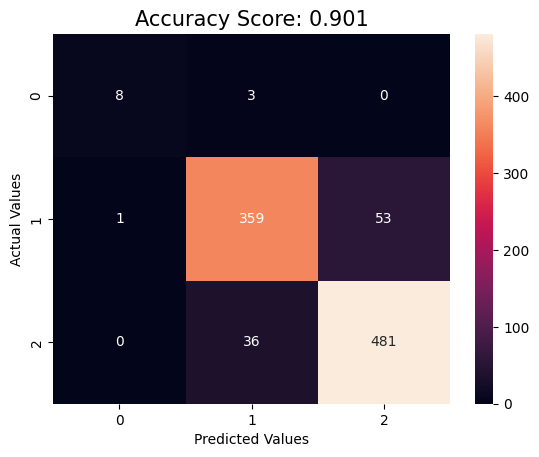

In [23]:
from sklearn.metrics import confusion_matrix as cm

X = df2_bins3.drop(columns=["PH RANGE"],axis=1) 
y = df2_bins3["PH RANGE"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

predictions = AutoML_df2.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [24]:
AutoML_df2.export('pipeline.py')
print(AutoML_df2.fitted_pipeline_)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=9, max_leaves=0, min_child_weight=3,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=1, num_parallel_tree=1,
                 

In [27]:
#save model 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

exported_pipeline = make_pipeline(
    MinMaxScaler(),
    XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)
)
exported_pipeline.fit(X, y)

with open('final_model.joblib', 'wb') as f:
    joblib.dump(exported_pipeline,f)